In [519]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [520]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clientes.csv')

In [521]:
df

,Unnamed: 0,Frecuencia_Compra,Gasto_Total,Duracion_Relacion
0,0,7,100.901121,2
1,1,4,37.173821,2
2,2,8,86.747285,3
3,3,5,140.391425,4
4,4,7,139.866024,2
...,...,...,...,...
95,95,10,91.562964,2
96,96,9,113.195243,2
97,97,7,170.787819,1
98,98,9,141.624221,1


# **Preprocesamiento**

In [522]:
df_copia = df.drop(['Unnamed: 0'], axis = 1)

In [523]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frecuencia_Compra  100 non-null    int64  
 1   Gasto_Total        100 non-null    float64
 2   Duracion_Relacion  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [524]:
df_copia

,Frecuencia_Compra,Gasto_Total,Duracion_Relacion
0,7,100.901121,2
1,4,37.173821,2
2,8,86.747285,3
3,5,140.391425,4
4,7,139.866024,2
...,...,...,...
95,10,91.562964,2
96,9,113.195243,2
97,7,170.787819,1
98,9,141.624221,1


Se eliminó la columna "Unnamed: 0". No tiene valores nulos.

In [525]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [526]:
df_copia_std = scaler.fit_transform(df_copia)
df_columns = df_copia.columns
df_copia_std = pd.DataFrame(df_copia_std, columns = df_columns)

In [527]:
df_copia_std

,Frecuencia_Compra,Gasto_Total,Duracion_Relacion
0,0.381532,-0.124013,-0.591843
1,-0.668556,-1.455707,-0.591843
2,0.731561,-0.419783,0.112732
3,-0.318527,0.701206,0.817307
4,0.381532,0.690227,-0.591843
...,...,...,...
95,1.431620,-0.319151,-0.591843
96,1.081590,0.132894,-0.591843
97,0.381532,1.336392,-1.296418
98,1.081590,0.726967,-1.296418


# **Agrupamiento con KMeans**

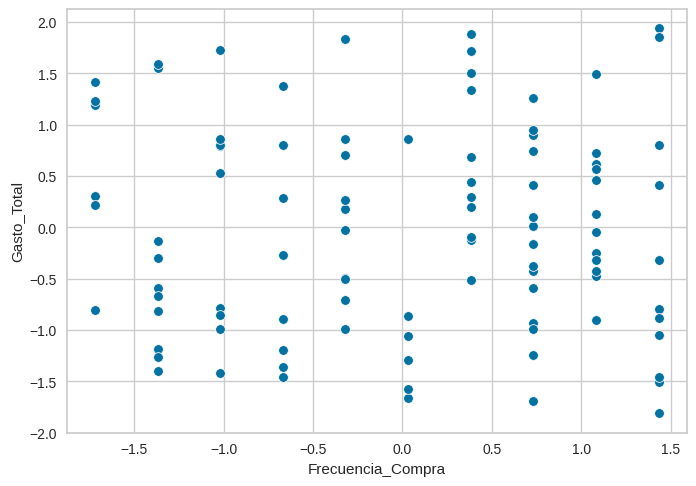

In [528]:
sns.scatterplot(x = df_copia_std.Frecuencia_Compra, y = df_copia_std.Gasto_Total)
plt.show()

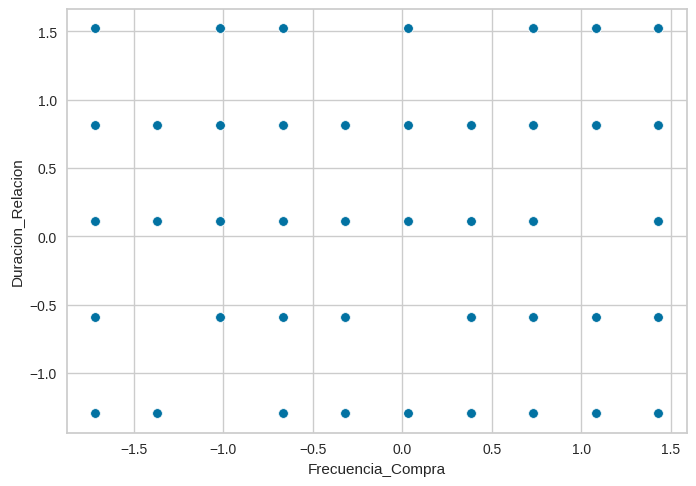

In [529]:
sns.scatterplot(x = df_copia_std.Frecuencia_Compra, y = df_copia_std.Duracion_Relacion)
plt.show()

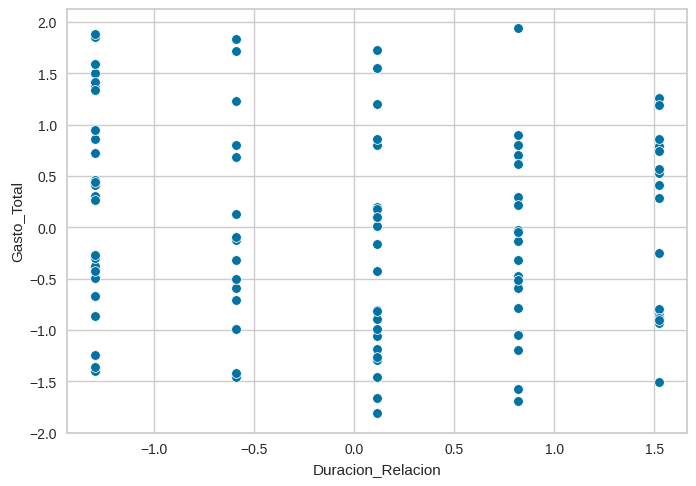

In [530]:
sns.scatterplot(x = df_copia_std.Duracion_Relacion, y = df_copia_std.Gasto_Total)
plt.show()

A simple vista parece que la cantidad de clusters necesarios es de 5.

In [531]:
km = KMeans(n_clusters = 5, random_state = 0)

In [532]:
km.fit(df_copia_std)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [533]:
labels = km.labels_
print(labels)

[3 2 0 4 3 3 4 0 3 1 1 0 0 4 2 3 2 0 2 1 4 1 0 2 3 4 0 1 3 1 3 4 2 2 3 2 0
 3 4 2 0 1 0 0 0 2 2 2 0 0 4 2 2 2 2 4 2 2 2 0 4 4 2 0 2 3 2 0 0 0 0 4 4 3
 0 0 3 0 1 0 3 0 0 4 2 0 1 1 2 2 1 1 2 0 3 3 3 3 3 3]


In [534]:
centers = km.cluster_centers_
print(centers)

[[ 0.98158209 -0.19137256  0.892797  ]
 [-1.19359982  1.22654982 -0.53312831]
 [-0.54739193 -0.99775344 -0.45634772]
 [ 0.67905679  0.66999532 -1.08504529]
 [-0.89357473  0.22725121  1.06894072]]


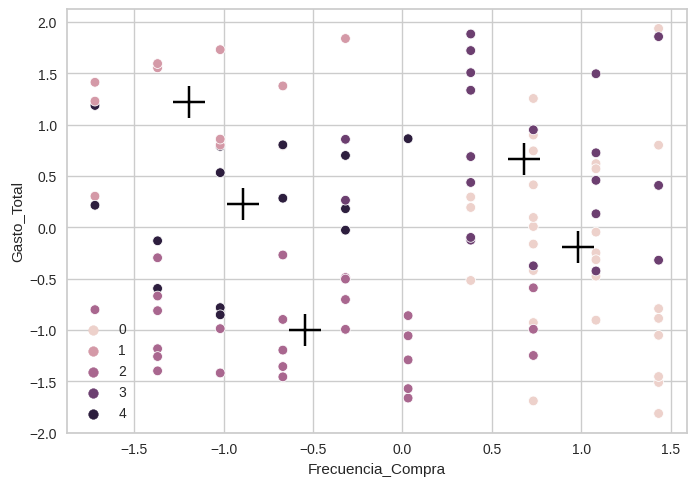

In [535]:
sns.scatterplot(x = df_copia_std.Frecuencia_Compra, y = df_copia_std.Gasto_Total, hue = labels)
sns.scatterplot(x = centers[:, 0], y = centers[:,1], color = 'black', marker = "+", s = 500)
plt.show()

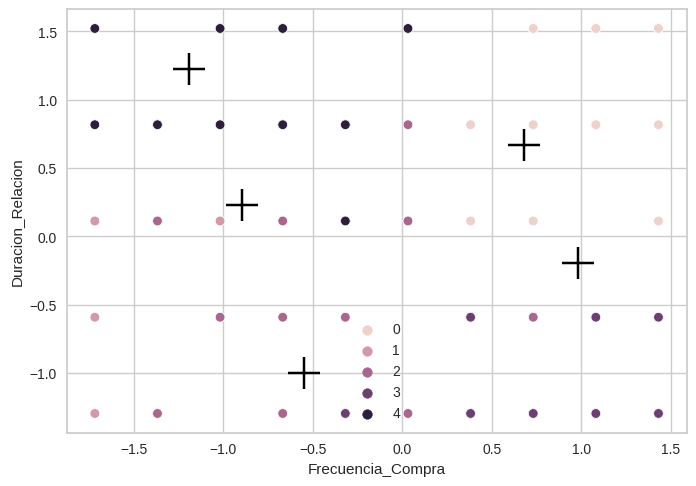

In [536]:
sns.scatterplot(x = df_copia_std.Frecuencia_Compra, y = df_copia_std.Duracion_Relacion, hue = labels)
sns.scatterplot(x = centers[:, 0], y = centers[:,1], color = 'black', marker = "+", s = 500)
plt.show()

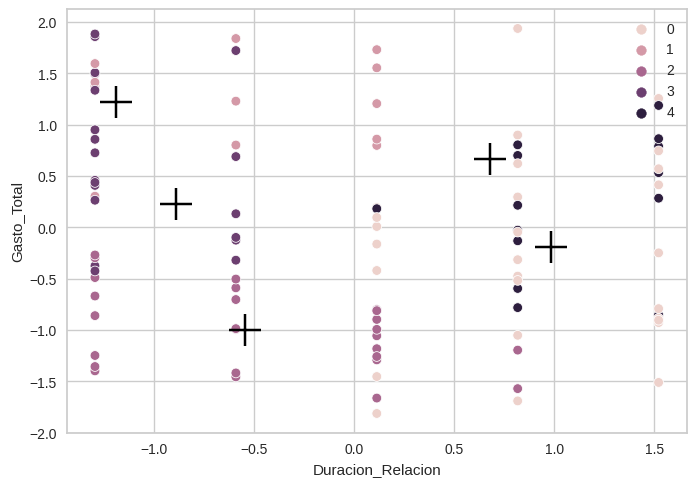

In [537]:
sns.scatterplot(x = df_copia_std.Duracion_Relacion, y = df_copia_std.Gasto_Total, hue = labels)
sns.scatterplot(x = centers[:, 0], y = centers[:,1], color = 'black', marker = "+", s = 500)
plt.show()

Aplicación de las métricas de calidad para determinar el número de clusters

In [538]:
def codo(data, max_cluster = 10):
  suma_de_cuadrados = []
  for i in range(1, max_cluster + 1):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data)
    suma_de_cuadrados.append(kmeans.inertia_)
  return suma_de_cuadrados

In [539]:
cluesters = 10
mc = codo(df_copia_std, cluesters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

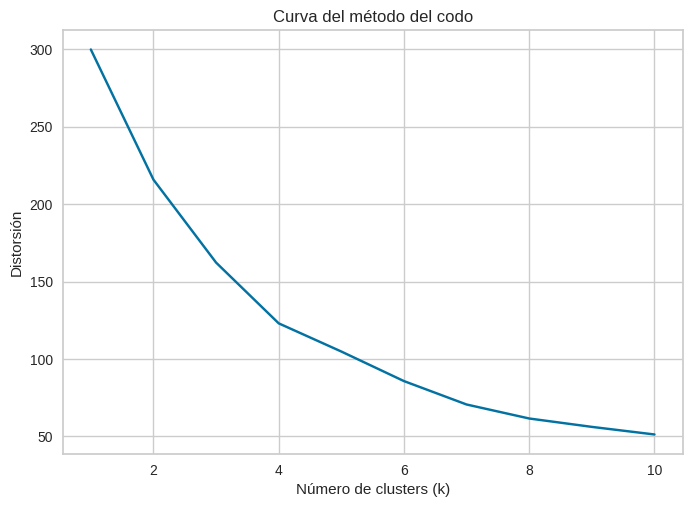

In [540]:
plt.plot(range(1, cluesters + 1), mc)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Distorsión')
plt.title('Curva del método del codo')
plt.show()

Pareciera que la cantidad de clusters óptima esta entre 3 y 4.
Se va a utilizar el método del codo con otra librería para comparar resultados.

In [541]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

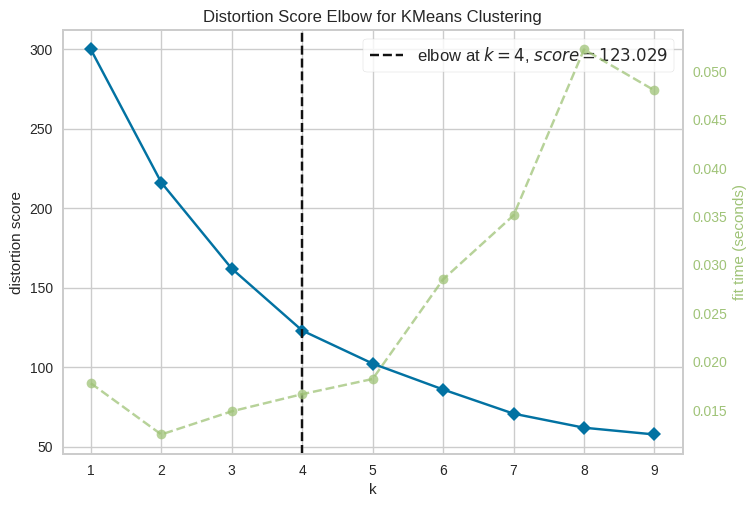

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [542]:
visualizador = KElbowVisualizer(model, k = (1,10))
visualizador.fit(df_copia_std)
visualizador.show()

Podemos determinar que según el método del codo la cantidad de clusters es de 4.
Ahora veremos que resultado nos da el método de la silueta.

In [543]:
from sklearn.metrics import silhouette_score

In [544]:
def silhouette(data, max_clusters = 10):
  scores = []
  for i in range(2, max_clusters + 2):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    scores.append(silhouette_avg)
  print(scores)
  best_k = 2 + scores.index(max(scores))
  return best_k

In [545]:
print("La cantidad de clusters más óptima es de: ", silhouette(df_copia_std))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.2592861331985128, 0.2781409473471925, 0.3174436433060367, 0.28494602523498125, 0.30916727600025945, 0.3179876771891889, 0.3250442037130775, 0.321915306137808, 0.32106635469455536, 0.30584529461227067]
La cantidad de clusters más óptima es de:  8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Como conclusión, utilizando el método del codo llegamos al resultado de que la cantidad de clusters más óptima es de 4, pero, al analizarlo también con el Silhouette Score, obtenemos que la más óptima es 8.

# **Agrupamiento por DBScan**

In [546]:
ds = DBSCAN(eps = 0.5, min_samples = 5)

In [547]:
ds.fit(df_copia_std)

DBSCAN()

In [548]:
labels = ds.labels_
labels

array([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [549]:
outliers = [x for x in labels if x == -1]

In [550]:
print("La cantidad de outliers o ruido que hay en los datos es de :", len(outliers))

La cantidad de outliers o ruido que hay en los datos es de : 95


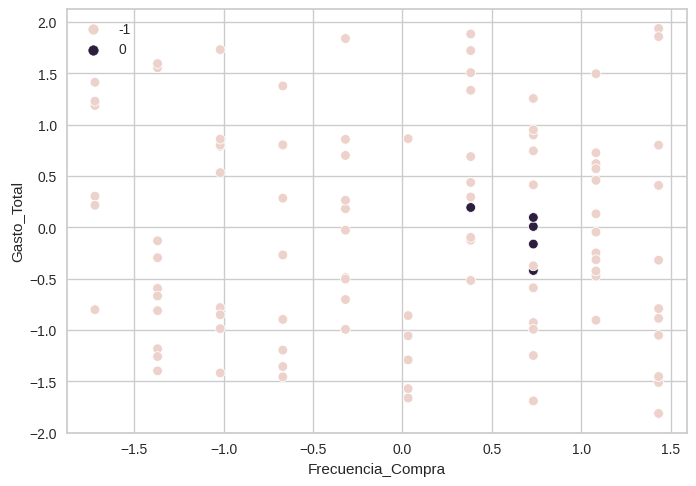

In [551]:
sns.scatterplot(x = df_copia_std.Frecuencia_Compra, y = df_copia_std.Gasto_Total, hue = labels)
plt.show()

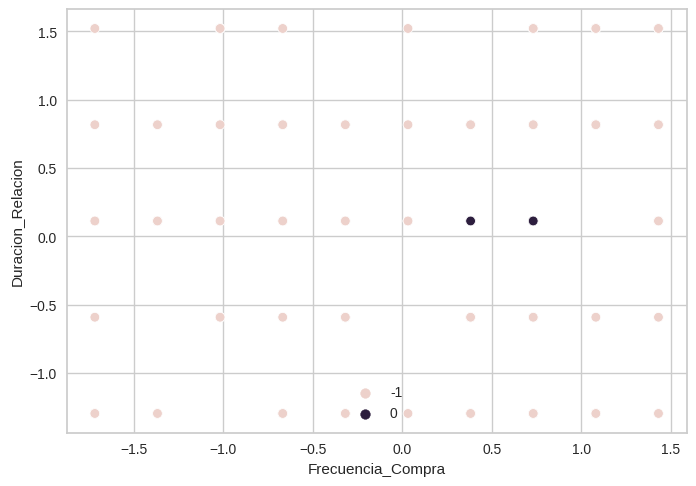

In [552]:
sns.scatterplot(x = df_copia_std.Frecuencia_Compra, y = df_copia_std.Duracion_Relacion, hue = labels)
plt.show()

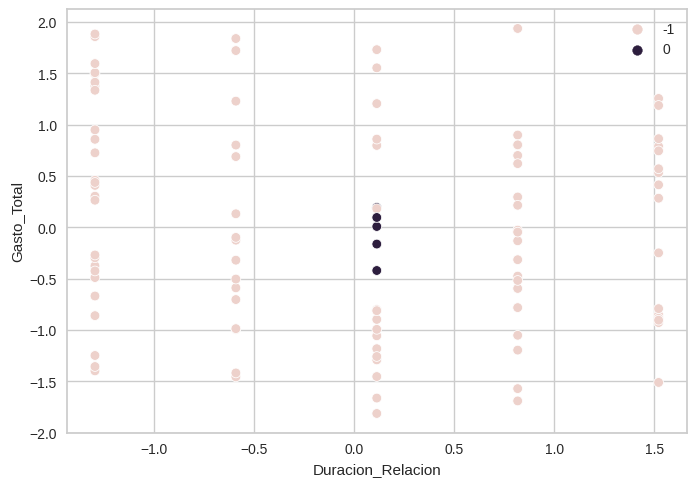

In [553]:
sns.scatterplot(x = df_copia_std.Duracion_Relacion, y = df_copia_std.Gasto_Total, hue = labels)
plt.show()

### Como conclusión, la cantidad de outliers que se pueden identificar al usar como hiperparámetro eps = 0.5 y min_samples = 5, es de 95.

# **Reducción de Dimensionalidad con PCA**

In [554]:
from sklearn.decomposition import PCA

In [555]:
pca_fit = PCA()
pca_fit = pca_fit.fit(df_copia_std)

In [556]:
pca_fit.explained_variance_ratio_

array([0.40103197, 0.31772133, 0.2812467 ])

In [557]:
pca_fit.explained_variance_ratio_ * 100

array([40.10319703, 31.77213309, 28.12466988])

In [558]:
pca_fit.explained_variance_

array([1.21524839, 0.96279191, 0.85226272])

In [559]:
pca_fit.components_

array([[ 0.50352126, -0.55897371,  0.65879795],
       [ 0.77162239,  0.63396404, -0.05185057],
       [-0.3886711 ,  0.53445111,  0.750531  ]])

# Interpretación de Resultados

Lo que se puede interpretar a partir de este análisis es que, gracias al agrupamiento por K-means, se puede decir que los clientes se segmentan en, principalmente, 4 grupos. Después, con el agrupamiento por DBScan (con los hiperparámetros ps = 0.5 y min_samples = 5) se destacan los siguientes puntos:  

1.   La mayor densidad de cliente, con respecto a la relacion de *Gasto_Total* y *Frecuencia_Compra*, se encuentra en una frecuencia alta de compra y en un gasto total medio.
2.   En la relacion *Duración_Relación* y *Frecuencia_Compra*, el grupo más denso está también en los que tienen más frecuencia y una duración de relación con la empresa media.
3. Por último, la relación *Gasto_Total* y *Duración_Relación*, la densidad se encuentra bastante proxima a lo que sería el centro del gráfico.

Para finalizar, al aplicar la reducción de la dimensionalidad con PCA se obtiene que los dos primeros componentes suman una varianza total explicada de aproximadamente el 71% de los datos.